In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
#sklearn ü sadece train_test_split ve load digits için kullandım neural ağları numpy ile yazdım
import time

In [2]:
datam = load_digits()
data = datam['data']
labels= datam['target']

In [3]:
data.shape#data

(1797, 64)

In [4]:
labels.shape#labels

(1797,)

## data shuffleing

In [5]:
#https://stackoverflow.com/questions/43229034/randomly-shuffle-data-and-labels-from-different-files-in-the-same-order
#idx = np.random.permutation(len(data))
#x,y = data[idx], labels[idx]

# train,test,split

In [6]:
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=0.10)

In [7]:
train_data.shape

(1617, 64)

In [8]:
test_data.shape

(180, 64)

In [9]:
train_data[0]

array([ 0.,  0.,  1.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  3., 16., 16.,
       12.,  0.,  0.,  0.,  1., 15., 16., 16., 12.,  0.,  0.,  0.,  3.,
       12., 15., 16., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16., 10.,  0.,
        0.,  0.,  0.,  0., 11., 16., 14.,  0.,  0.,  0.,  0.,  0., 11.,
       16., 16.,  1.,  0.,  0.,  0.,  0.,  5., 13.,  7.,  0.,  0.])

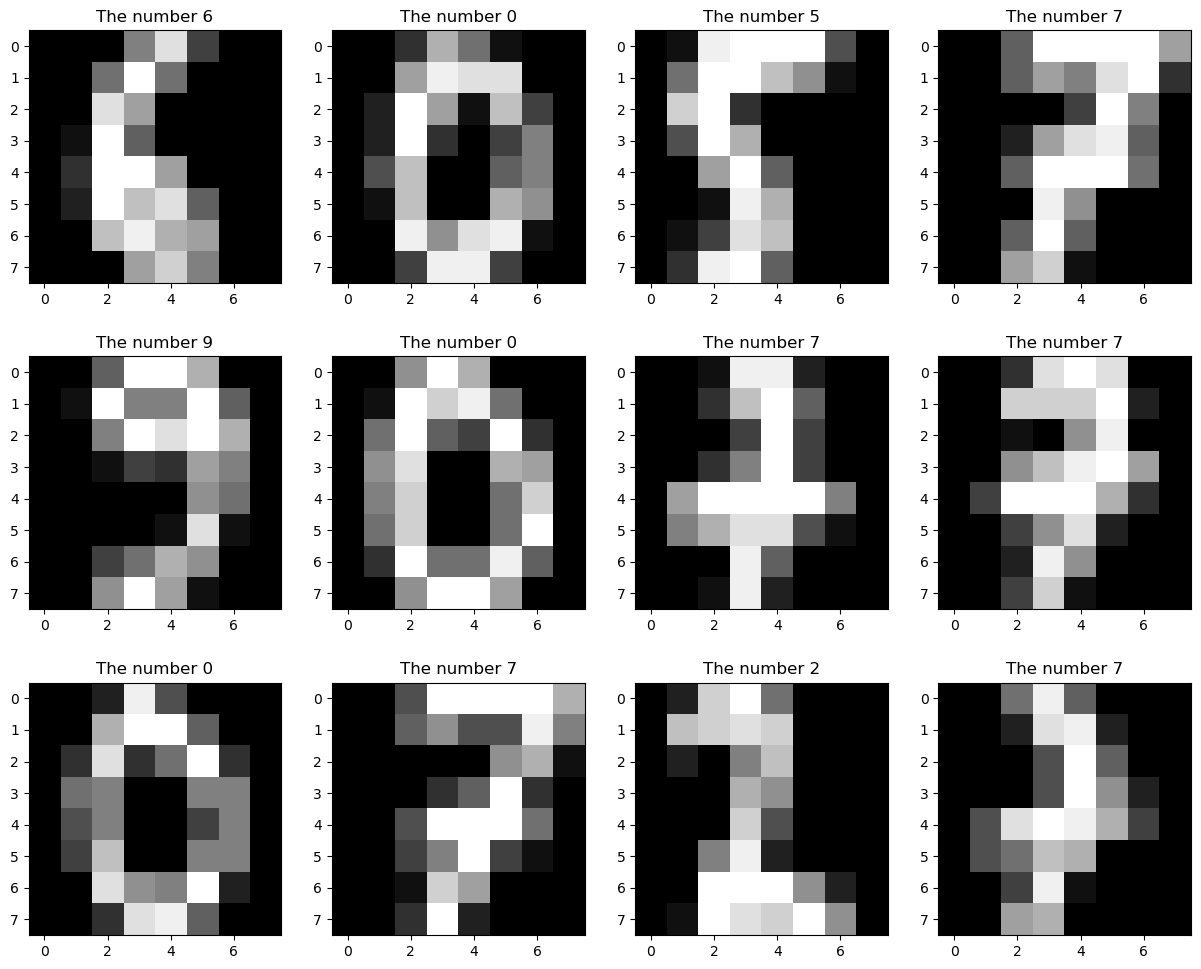

In [10]:
fig,axs=plt.subplots(3,4,figsize=(15,12))

for ax in axs.flatten():
    randomimage=np.random.randint(0,1797)
    img=np.reshape(data[randomimage,:],(8,8))
    ax.imshow(img,"gray")
    ax.set_title("The number %i"%labels[randomimage])

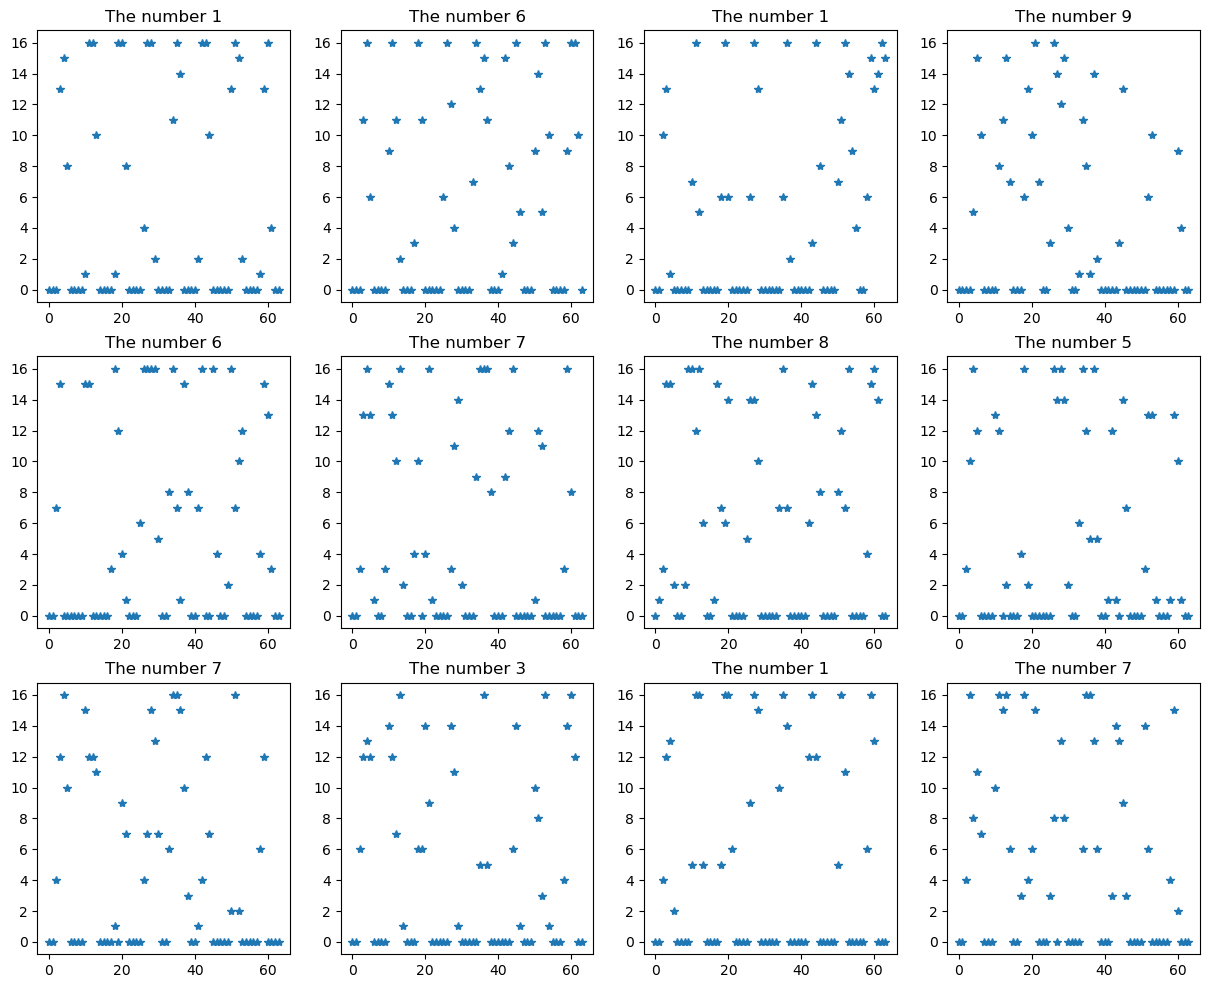

In [11]:
#how model see image.

fig,axs=plt.subplots(3,4,figsize=(15,12))

for ax in axs.flatten():
    randomimage=np.random.randint(0,1797)
    ax.plot(data[randomimage],"*")
    ax.set_title("The number %i"%labels[randomimage])

In [12]:
input_dim=8*8 #64
output_dim=10 #classes

In [13]:
train_data

array([[ 0.,  0.,  1., ...,  7.,  0.,  0.],
       [ 0.,  0.,  2., ..., 16.,  6.,  0.],
       [ 0.,  1.,  7., ...,  5.,  0.,  0.],
       ...,
       [ 0.,  1., 11., ...,  6.,  0.,  0.],
       [ 0.,  0.,  1., ...,  5.,  0.,  0.],
       [ 0.,  0.,  6., ...,  0.,  0.,  0.]])

In [14]:
train_labels

array([1, 9, 9, ..., 3, 8, 5])

In [15]:
train_data.shape

(1617, 64)

In [16]:
train_labels.shape

(1617,)

In [17]:
#şimdi düşünelim.
# kaç layer olucak.


In [18]:
np.random.seed(10)

def relu(Z):
    return np.maximum(Z,0)
    

def relu_türev(Z):
    return Z > 0
    
    
def sigmoid(Z):
    return 1/(1+np.exp(-Z))
 

def sigmoid_türev(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def deriv_softmax(Z):    
    dZ = np.exp(Z) / sum(np.exp(Z)) * (1. - np.exp(Z) / sum(np.exp(Z)))
    return dZ

def loss(y_pred,y_true):#bunu kullanmıyorum loss2 nin türevini daha rahat alırım diye düşündüm ama ;sonraya yapıcam.
    '''
    Loss function: cross entropy with an L^2 regularization
    y_true: ground truth, of shape (N, )
    y_pred: prediction made by the model, of shape (N, K) 
    N: number of samples in the batch
    K: global variable, number of classes
    '''
    global K 
    K = 10
    N = len(y_true)
    # loss_sample stores the cross entropy for each sample in X
    # convert y_true from labels to one-hot-vector encoding
    y_true_one_hot_vec = (y_true[:,np.newaxis] == np.arange(K))
    loss_sample = (np.log(y_pred) * y_true_one_hot_vec).sum(axis=1)
    # loss_sample is a dimension (N,) array
    # for the final loss, we need take the average
    return -np.mean(loss_sample)
def loss2(y_pred,y_true):
    K = 10
    N = len(y_true)
    y_true_one_hot_vec = (y_true[:,np.newaxis] == np.arange(K))
    loss_sample=(((y_true_one_hot_vec-y_pred)**2)/(2*1617)).sum()
    return loss_sample
    


In [19]:
#forward propagation:

#birinci layer (hidden layer)
w1=np.random.rand(32*64)*0.02
w1=w1.reshape(32,64).transpose()
b1=0
z1=(train_data @ w1)+b1
a1=relu(z1)#relu
#ikinci layer(hidden layer)
w2=np.random.rand(16*32)*0.02
w2=w2.reshape(16,32).transpose()
b2=0
z2=a1 @ w2+b2
a2=relu(z2)#relu
#üçüncü layer(output layer)
w3=np.random.rand(10*16)*0.02
w3=w3.reshape(10,16).transpose()
b3=0
z3=a2 @ w3+b3
a3=sigmoid(z3)#sigmoid
print(a1.shape)
print(a2.shape)
print(a3.shape)

(1617, 32)
(1617, 16)
(1617, 10)


In [20]:
loss2(a3,train_labels)


1.406078100388728

In [21]:
#cost fonksiyonunun weightlerle yazılması ; türevini daha rahat alırım diye düşündüm ; yanlış düşünmüş olabilirim...
K=10
m=1617
y_true_one_hot_vec = (train_labels[:,np.newaxis] == np.arange(K))
1/(2*m) * (((1/(1+np.exp(-(np.maximum(0,np.maximum(0,train_data @ w1+b1)@w2+b1) @w3+b1))))-y_true_one_hot_vec)**2).sum()

1.406078100388728

In [22]:
y_true_one_hot_vec

array([[False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

In [23]:
#too much calculations.
#can't do it now.
alpha=0.01
#backward=
dz3=
dw3=
db3=

dz2=
dw2=
db2=

dz1=
dw1=
db1=


SyntaxError: invalid syntax (2794765917.py, line 5)

In [ ]:
#coss fonksiyonunun w3 e göre türevi:

#coss fonksiyonunun b3 e göre türevi:

#coss fonksiyonunun w2 e göre türevi:

#coss fonksiyonunun b2 e göre türevi:

#coss fonksiyonunun w1 e göre türevi:

#coss fonksiyonunun b1 e göre türevi:




In [ ]:

alpha=0.01
#y_one_hot_vec = (a3[:,np.newaxis] == np.arange(K))
#delta2 = (a3 - y_one_hot_vec)
#gradw2=a3.T @ delta2
#w3_back=w3-alpha*
